<font size=5>**CHURN PREDICTION**

<font size=4>**By: Aston Glen Noronha, Aatish Kayyath, Rohith Sure**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style = 'white')

In [40]:
telecom_cust = pd.read_csv("churn_data.csv")

In [41]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Checking for any missing values.

In [43]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [44]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values for Total Charges. Let us remove these 11 rows from our data set

In [45]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables using one-hot encoding
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

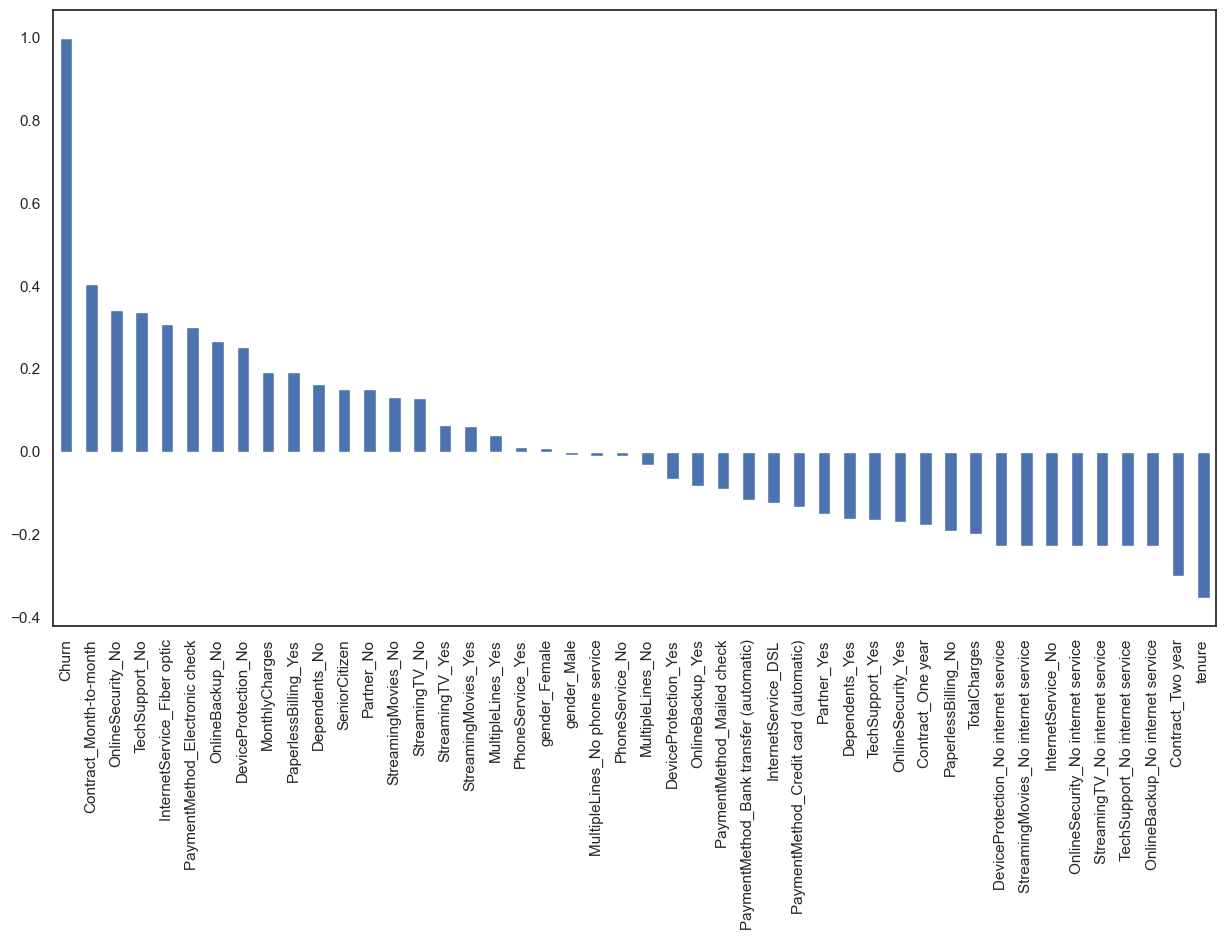

In [46]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Observations:
1. Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn. 

2. Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

## Data Exploration



***Demographics*** - Let us first understand the gender, age range, partner and dependent status of the customers

1. **Gender Distribution** - About half of the customers in our data set are male while the other half are female

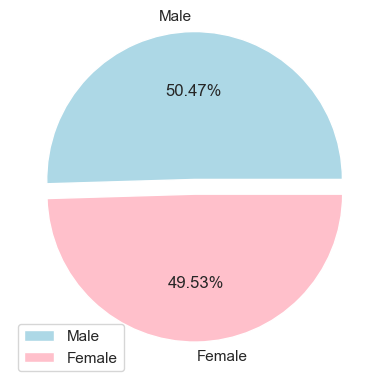

In [47]:
colors = ['lightblue','pink']
x = round(telecom_cust["gender"].value_counts()/telecom_cust.shape[0]*100,2)
plt.pie(x,labels = ["Male", "Female"],colors=colors,  explode = [0.1,0], autopct= '%.2f%%')
plt.legend()
plt.show()

2. **% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


Text(0.5, 1.0, '% of Senior Citizens')

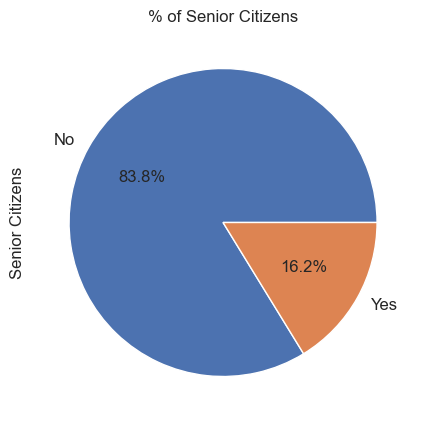

In [48]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

3. **Partner and dependent status**  - About 50% of the customers have a partner, while only 30% of the total customers have dependents. 

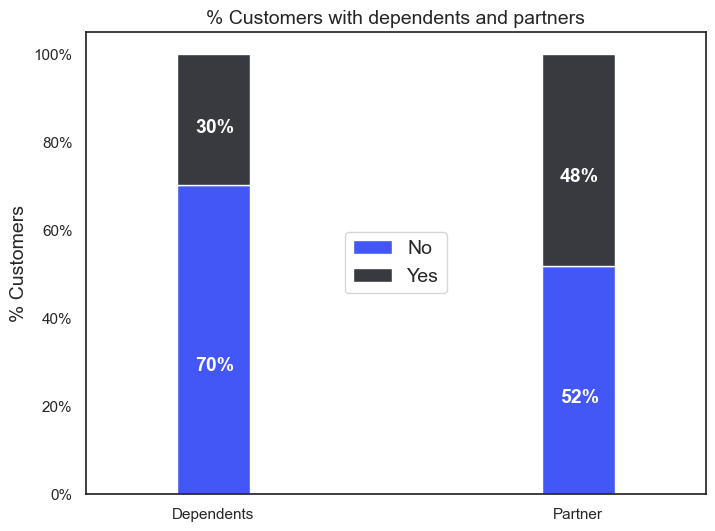

In [49]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4257f5','#393a40']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,figsize=(8,6),rot = 0,width = 0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

Half of the customers who have partners, also have dependents, while the other half do not.
Interestingly, customers who do not have partners, 80% of them do not have dependents.

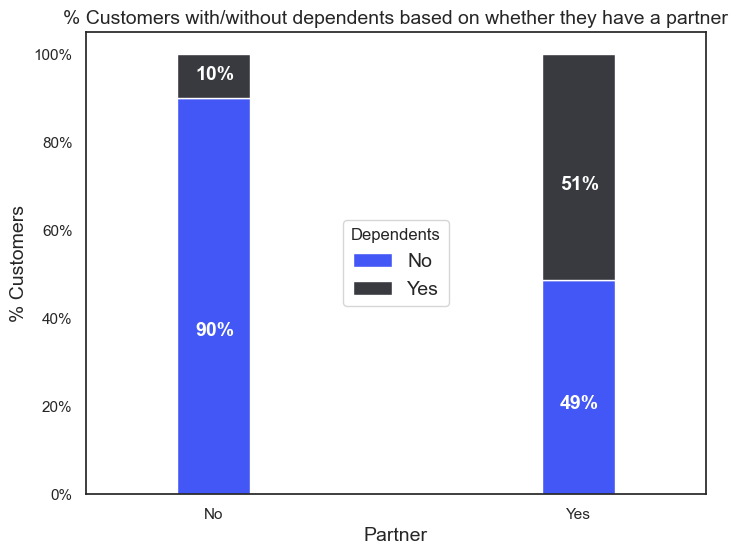

In [50]:
colors = ['#4257f5','#393a40']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

There is no difference in the % of customers with/without dependents and partners by gender.

**Customer Account Information**:  Let u now look at the tenure, contract

**1. Tenure:**  

C:\Users\Aston\AppData\Local\Temp\ipykernel_16768\2715800857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

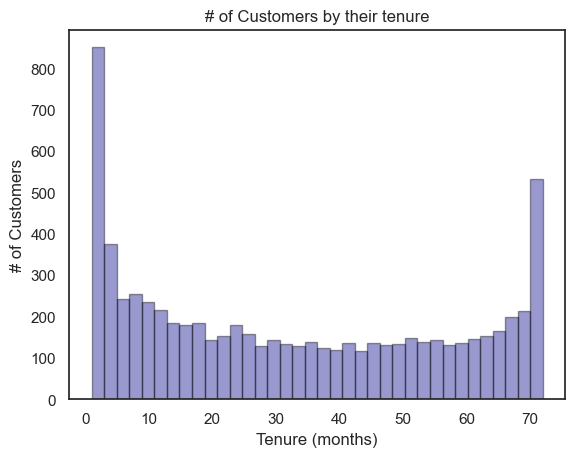

In [51]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Looking at the above histogram, we can see that a lot of customers have been with the telecom company for just a month, while quite a many were there for about 72 months. This could potentially be because different customers have different contracts. Thus depending on the contract, there could be more/less easier for the customers to stay/leave the telecom company.

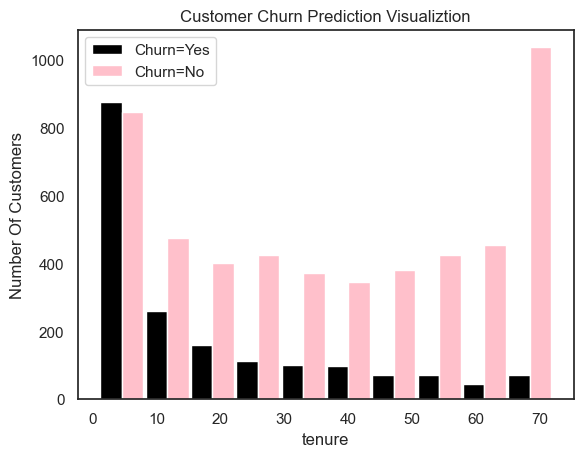

In [52]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
tenure_churn_no = telecom_cust[telecom_cust.Churn=='No'].tenure
tenure_churn_yes = telecom_cust[telecom_cust.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['black','pink'],label=['Churn=Yes','Churn=No'])
plt.legend()

**2. Contracts:**

Text(0.5, 1.0, '# of Customers by Contract Type')

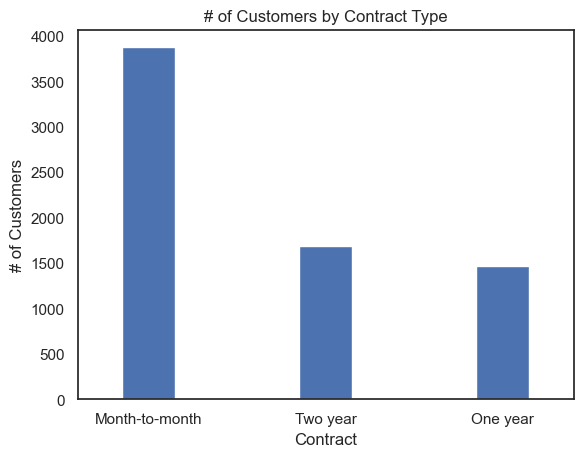

In [53]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Most of the customers are in a month-to-month contract.
While there are fairly equal number of customers in the 1 year and 2 year contracts.



C:\Users\Aston\AppData\Local\Temp\ipykernel_16768\3842341399.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
C:\Users\Aston\AppData\Local\Temp\ipykernel_16768\3842341399.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.

Text(0.5, 1.0, 'Two Year Contract')

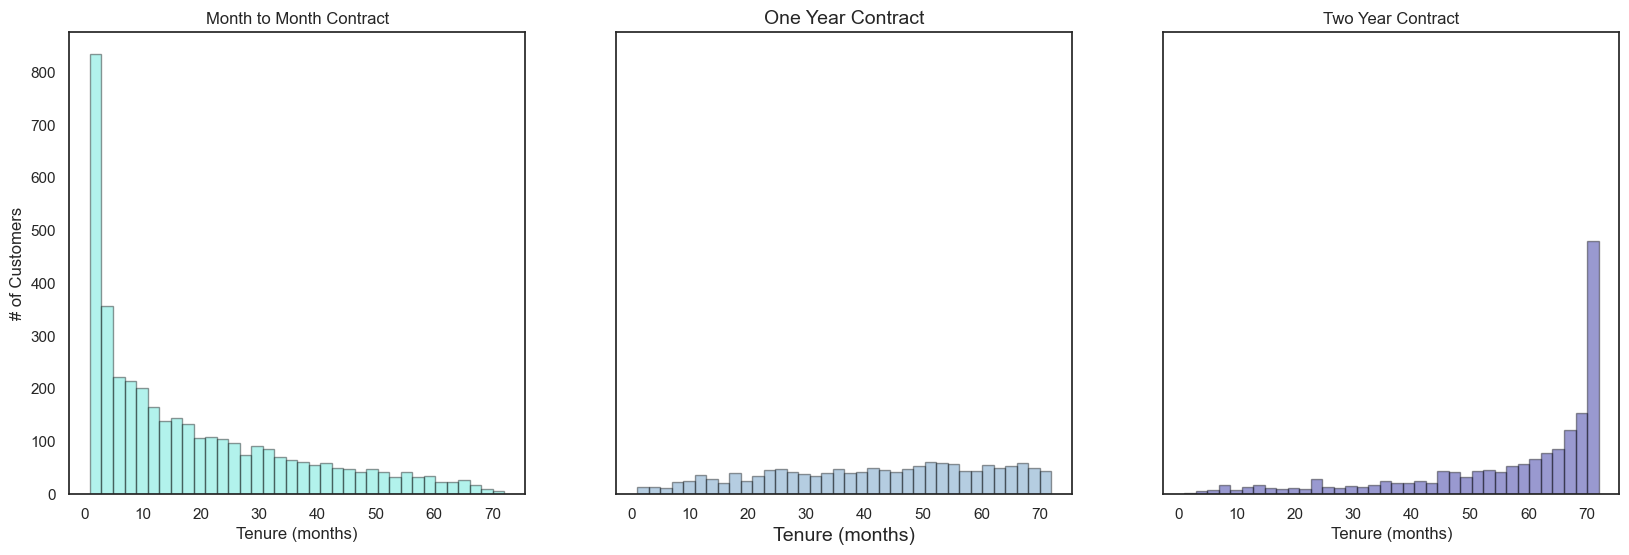

In [54]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Majority of the customers having month-to-month contract last for 1-2 months, while customers with 2-year contracts tend to last for about 70 months. This implies that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. 

This is also what we saw in the earlier chart on correlation with the churn rate. 


**Distribution of various services used by customers**

In [55]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

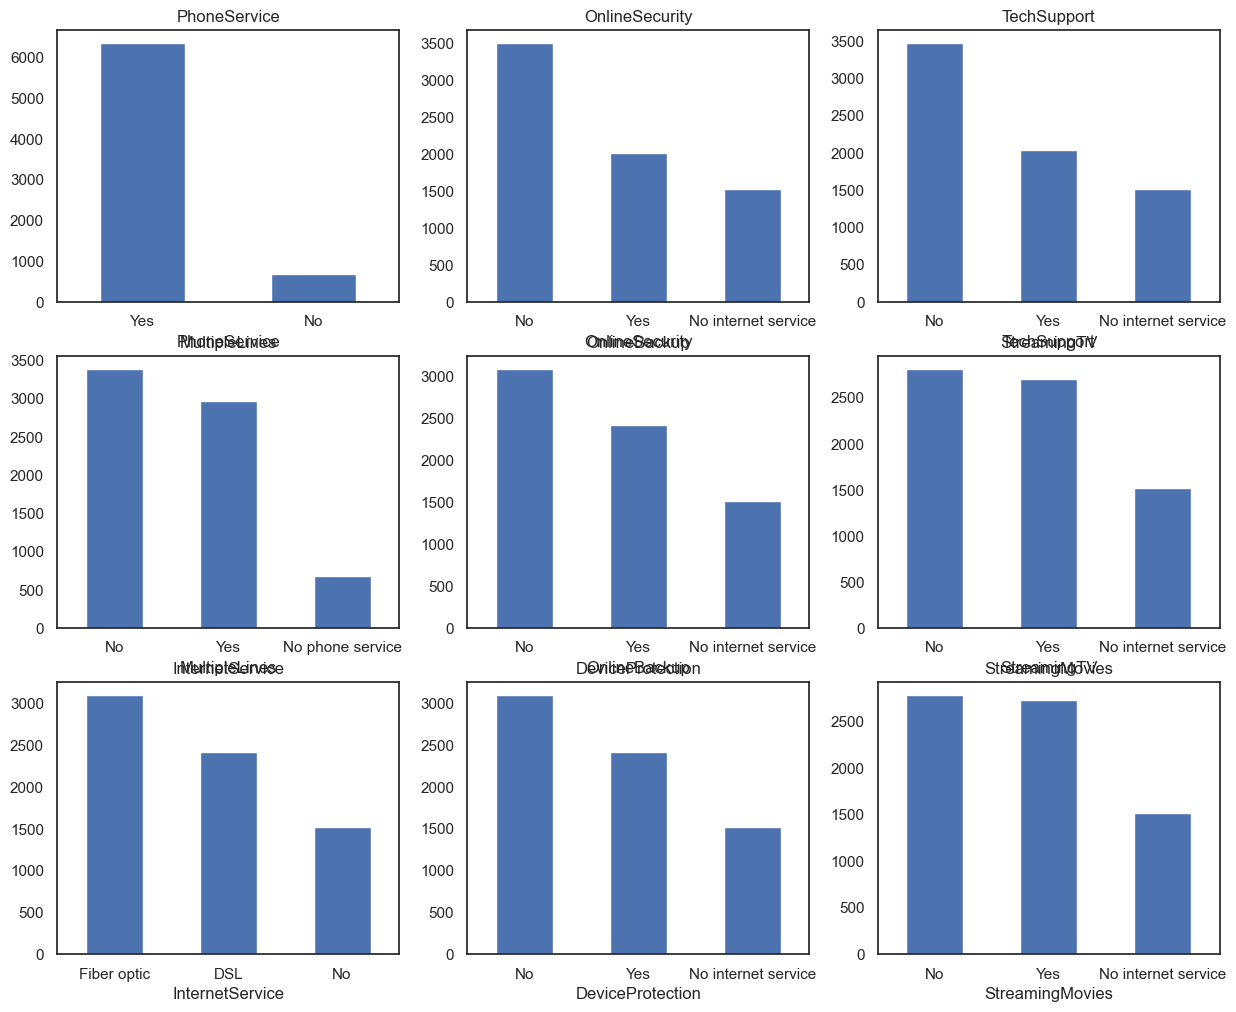

In [56]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

**Relation between monthly and total charges**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

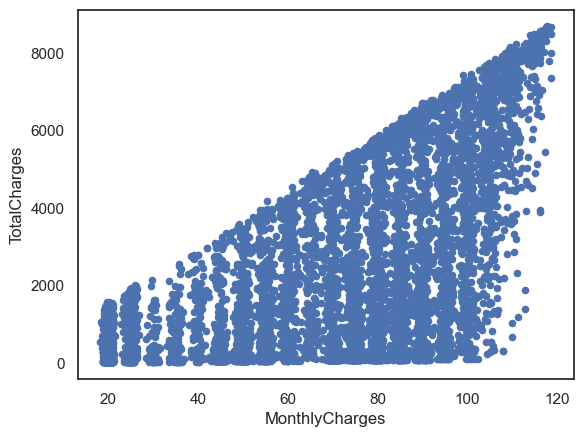

In [57]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

Total charges increases as the monthly bill for a customer increases.

### Predictor variable (Churn) vs other important variables

**1. Churn rate in the data**

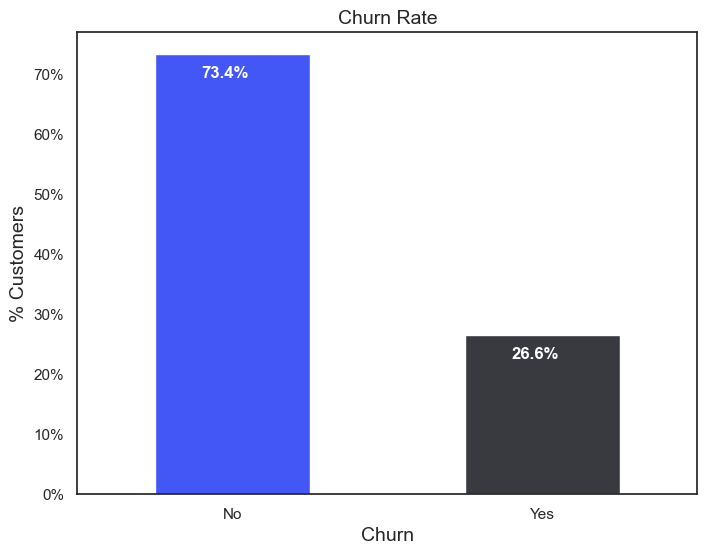

In [58]:
colors = ['#4257f5','#393a40']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.0,str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white',weight = 'bold')

74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn.

**2. Churn rate vs tenure, seniority, contract type, monthly charges and total charges**

**i.) Churn vs Tenure**:

<Axes: xlabel='Churn', ylabel='tenure'>

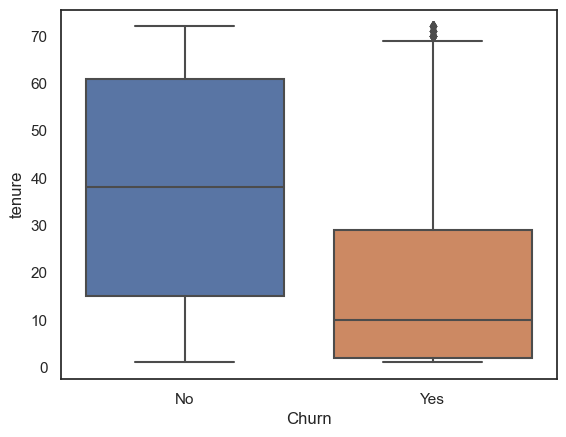

In [59]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

The customers who do not churn, they tend to stay for a longer tenure

**ii.) Churn by Contract Type**:


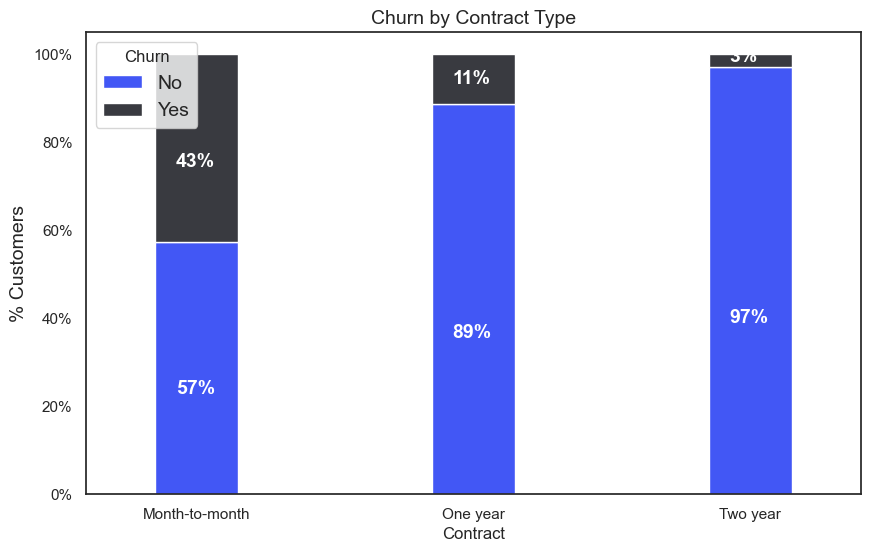

In [60]:
colors = ['#4257f5','#393a40']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

The customers who have a month-to-month contract have a very high churn rate.

**iii.) Churn by Seniority**:

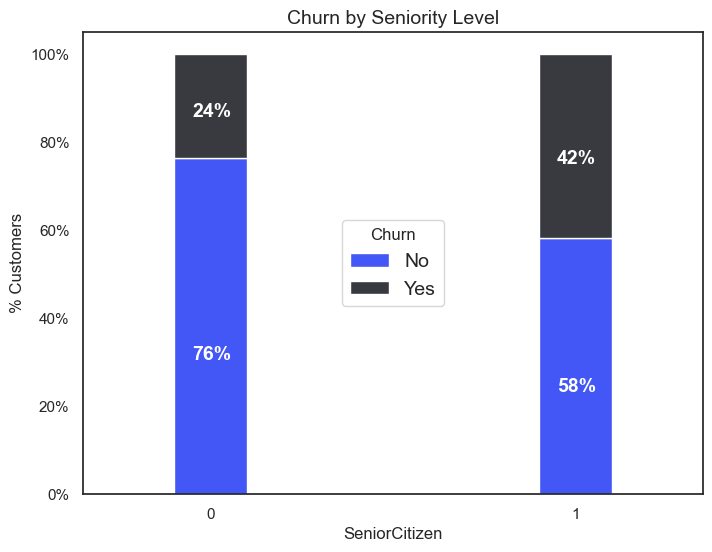

In [61]:
colors = ['#4257f5','#393a40']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size =14)

Senior Citizens have almost double the churn rate than younger population.

**iv.) Churn by Monthly Charges**: 

C:\Users\Aston\AppData\Local\Temp\ipykernel_16768\2963598407.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
C:\Users\Aston\AppData\Local\Temp\ipykernel_16768\2963598407.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

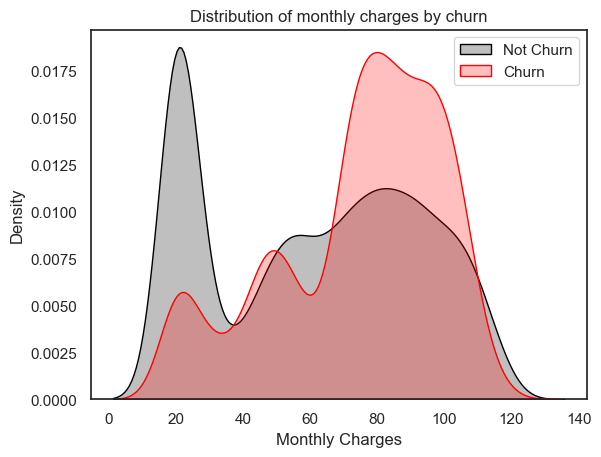

In [62]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="black", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

As monthly charges increase, % of customers who churn also increase.

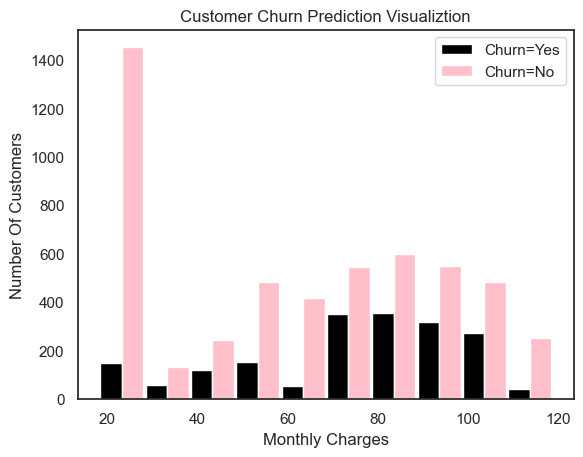

In [63]:
mc_churn_no = telecom_cust[telecom_cust.Churn=='No'].MonthlyCharges      
mc_churn_yes = telecom_cust[telecom_cust.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['black','pink'],label=['Churn=Yes','Churn=No'])
plt.legend()

**v.) Churn by Total Charges**: 

C:\Users\Aston\AppData\Local\Temp\ipykernel_16768\3097405637.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
C:\Users\Aston\AppData\Local\Temp\ipykernel_16768\3097405637.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of total charges by churn')

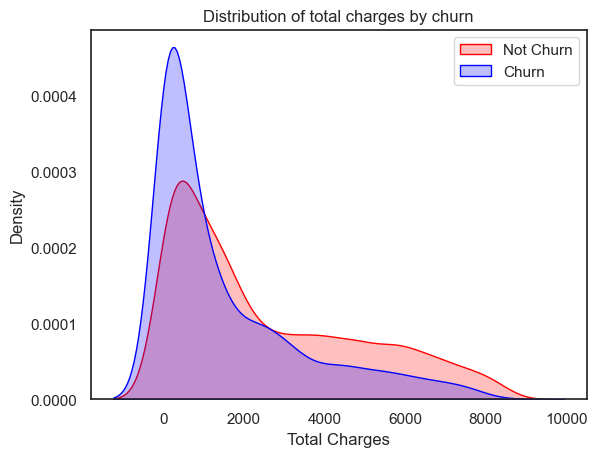

In [64]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

When the total charges are low, there is a high churn rate, which is weird.

In [65]:
!pip install dython

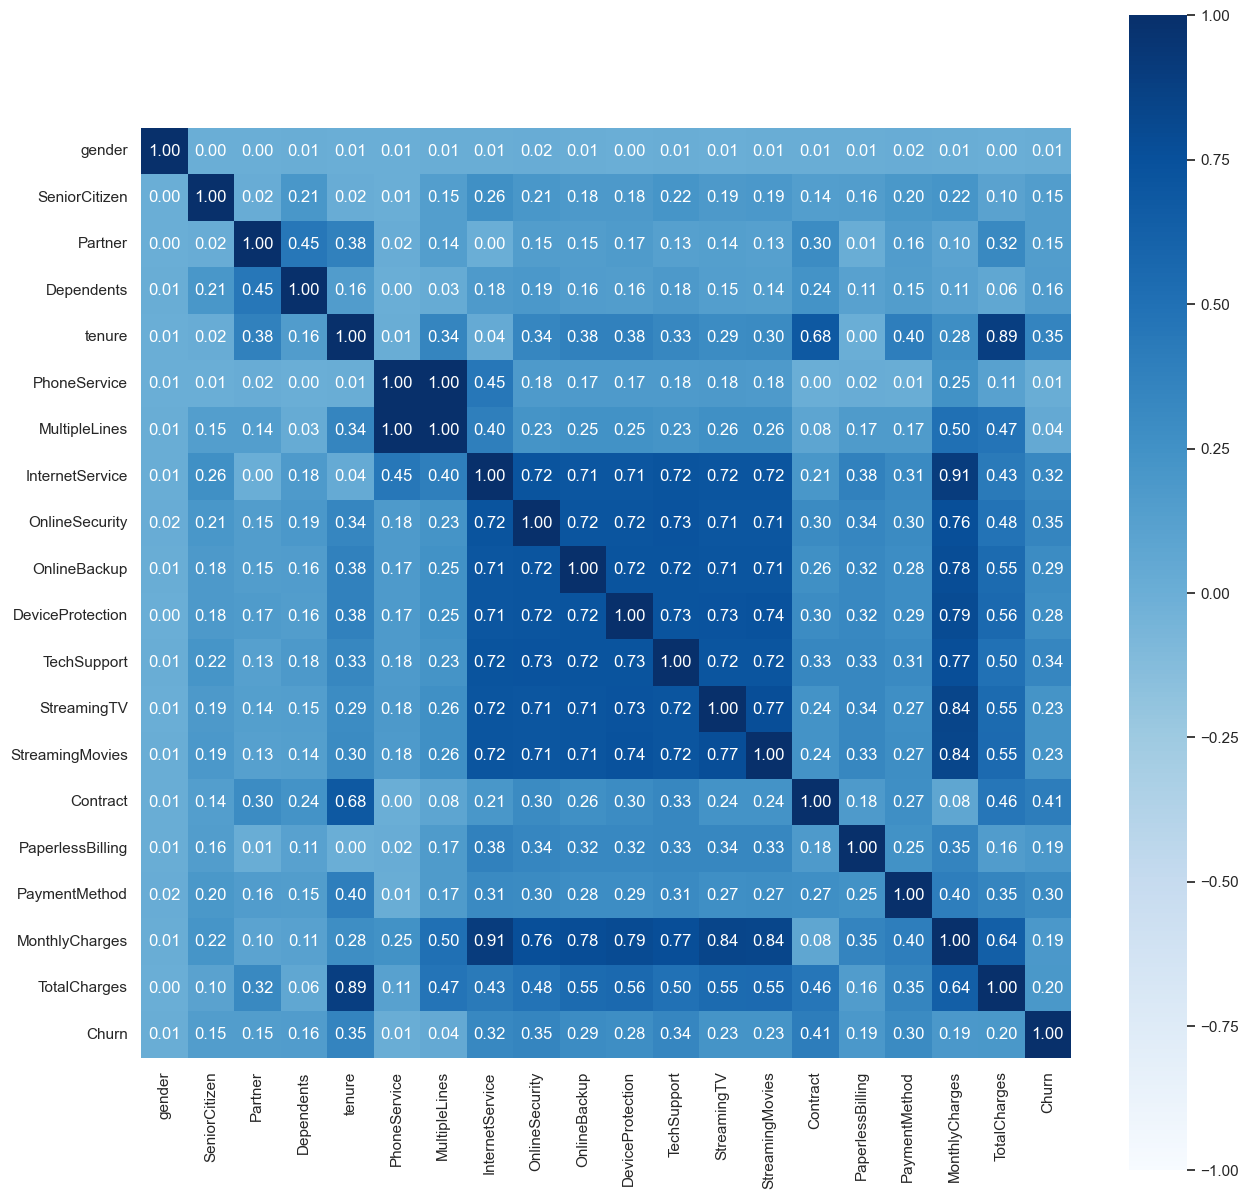

{'corr':                     gender  SeniorCitizen   Partner  Dependents    tenure   
 gender            1.000000       0.001434  0.001094    0.010038  0.005285  \
 SeniorCitizen     0.001434       1.000000  0.016571    0.210129  0.015683   
 Partner           0.001094       0.016571  1.000000    0.451958  0.381912   
 Dependents        0.010038       0.210129  0.451958    1.000000  0.163386   
 tenure            0.005285       0.015683  0.381912    0.163386  1.000000   
 PhoneService      0.007034       0.007739  0.017916    0.000552  0.007877   
 MultipleLines     0.010314       0.146730  0.144302    0.025025  0.343997   
 InternetService   0.011202       0.264920  0.001277    0.178412  0.037532   
 OnlineSecurity    0.016344       0.210728  0.151911    0.192981  0.336994   
 OnlineBackup      0.013095       0.182546  0.153303    0.161155  0.377006   
 DeviceProtection  0.004866       0.182831  0.165903    0.155949  0.377311   
 TechSupport       0.008740       0.223709  0.127510    

In [66]:
from dython.nominal import associations
import pandas as pd

# Assuming telecom_cust is your dataframe
associations(telecom_cust,
             numerical_columns=['tenure', 'MonthlyCharges', 'TotalCharges'],
             nom_nom_assoc='cramer',
             num_num_assoc='spearman',
             cramers_v_bias_correction=False,
             hide_columns=['customerID'],
             hide_rows=['customerID'],
             figsize=(15, 15),
             cmap="Blues")


In [67]:
from sklearn.metrics import mean_squared_error, r2_score, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

**Scaling Data**

In [68]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1. This helped  improve the accuracy from 79.7% to 80.7%. Furthermore, you will notice below that the importance of variables is also aligned with what we are seeing in Random Forest algorithm and the EDA we conducted above.

**1. Logistic Regression**

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

Accuracy:  0.8075829383886256
R2 score:  0.8023161316537992
RMSE:  0.43865369212098787
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



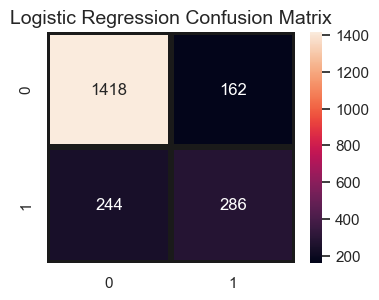

In [71]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, prediction_test))
print("R2 score: ",model.score(X_train, y_train))
y_pred= model.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()

**Logistic Regression with L2 Regularization**

[LibLinear]Accuracy:  0.8071090047393364
R2 score:  0.8017066233238521
RMSE:  0.43919357379254026
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1580
           1       0.63      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



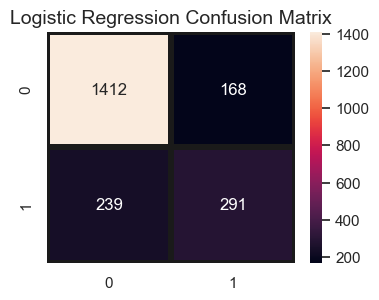

In [72]:
model1=LogisticRegression(penalty="l1",C=100,solver="liblinear",verbose=50)
result = model1.fit(X_train, y_train)
prediction_test = model1.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, prediction_test))
print("R2 score: ",model1.score(X_train, y_train))
y_pred= model1.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()

Axes(0.125,0.11;0.775x0.77)


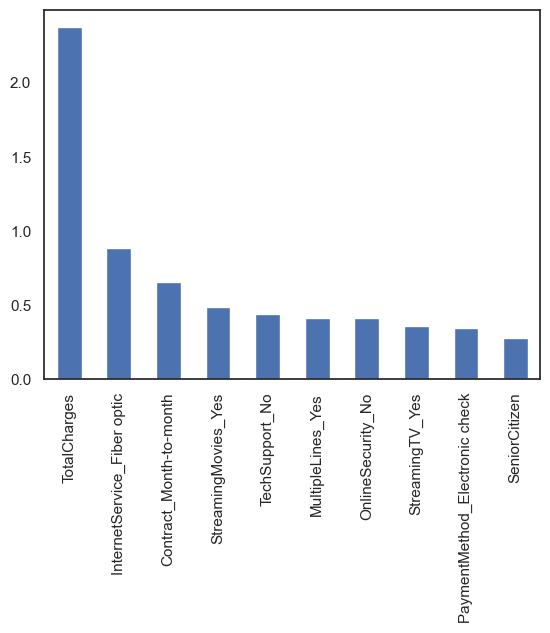

In [73]:
weights = pd.Series(model1.coef_[0],index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

**Observations**

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:
* As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
* Having DSL internet service also reduces the proability of Churn
* Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are  likely to churn because of it. I think we need to explore more to better understad why this is happening. 

Any hypothesis on the above would be really helpful! 

**2. Random Forest**

C:\Users\Aston\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score:  0.8095238095238095
R2 score:  0.8126222222222222
RMSE value:  0.4364357804719847
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1052
           1       0.66      0.50      0.57       355

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.80      0.81      0.80      1407



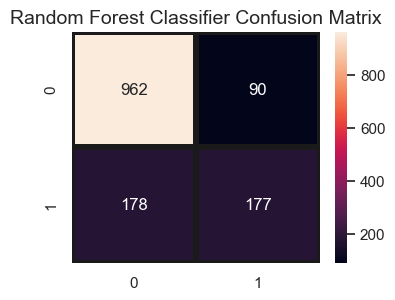

In [74]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=300 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print("Accuracy Score: ",metrics.accuracy_score(y_test, prediction_test))
print("R2 score: ",model_rf.score(X_train, y_train))
print("RMSE value: ",np.sqrt(metrics.mean_squared_error(y_test,prediction_test)))
print(classification_report(y_test, prediction_test))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Random Forest Classifier Confusion Matrix",fontsize=14)
plt.show()

**Random Forest with RandomizedSearchCV to find the best parameters**

In [75]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 5)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [76]:
import time
t1 = time.time()
rf2 = RandomForestClassifier() 
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 180, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf2_random.fit(X_train, y_train)
t2 =time.time()

Fitting 3 folds for each of 180 candidates, totalling 540 fits


In [77]:
rf2_random.best_params_

{'n_estimators': 650,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

Accuracy Score:  0.8095238095238095
R2 score:  0.8462222222222222
RMSE:  0.43069834698786696
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.67      0.52      0.59       355

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.81      1407



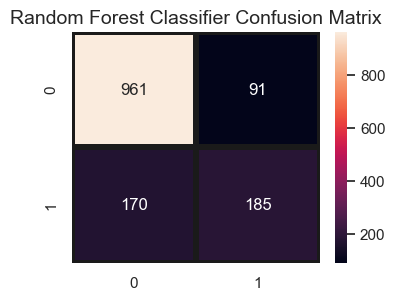

In [78]:
print("Accuracy Score: ",metrics.accuracy_score(y_test, prediction_test))
print("R2 score: ",rf2_random.score(X_train, y_train))
y_pred= rf2_random.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Random Forest Classifier Confusion Matrix",fontsize=14)
plt.show()

**Slight increase in R2 score**

In [79]:
rf3=RandomForestClassifier(n_estimators=300 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",min_samples_split=5,min_samples_leaf= 2,
                                  max_leaf_nodes = 30,max_depth= 10, bootstrap= True)
rf3.fit(X_train, y_train)

C:\Users\Aston\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', max_leaf_nodes=30,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=50)

<Axes: >

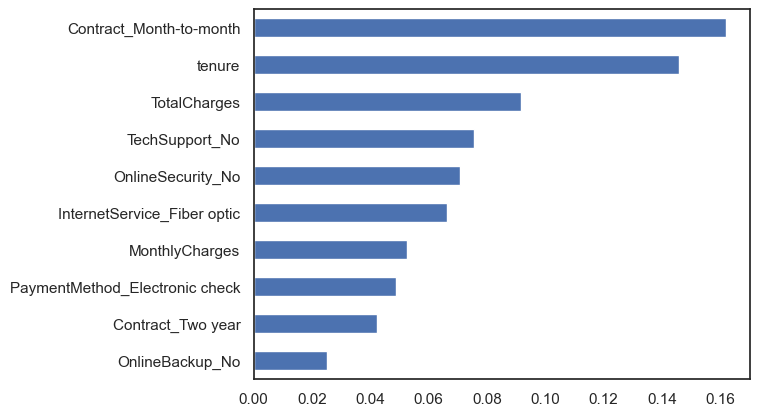

In [80]:
importances = rf3.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

**Observations:**

* From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
* The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

**3. KNN**

In [82]:
X=df_dummies.drop('Churn',axis=1)
y=df_dummies['Churn']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=101)

Accuracy Score:  0.7573459715639811
R2 score:  0.8354327509142625
RMSE:  0.4925992574456634
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1580
           1       0.52      0.49      0.51       530

    accuracy                           0.76      2110
   macro avg       0.68      0.67      0.67      2110
weighted avg       0.75      0.76      0.76      2110



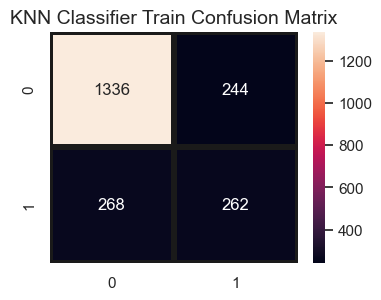

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred_test = knn.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))
print("R2 score: ",knn.score(X_train, y_train))
y_pred= knn.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN Classifier Train Confusion Matrix",fontsize=14)
plt.show()

In [85]:
knn_params = {'n_neighbors':np.arange(1, 101), 'weights':['uniform','distance']}

rand = GridSearchCV(knn, knn_params, cv = 5)

rand.fit(X_train, y_train)

print(rand.best_params_)

rand_best_knn = rand.best_params_

KNN = KNeighborsClassifier(**rand_best_knn)

KNN.fit(X_train,y_train)

{'n_neighbors': 65, 'weights': 'uniform'}


KNeighborsClassifier(n_neighbors=65)

Accuracy Score:  0.7895734597156399
R2 score:  0.7937830150345389
RMSE:  0.4587227270196673
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1580
           1       0.58      0.58      0.58       530

    accuracy                           0.79      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110



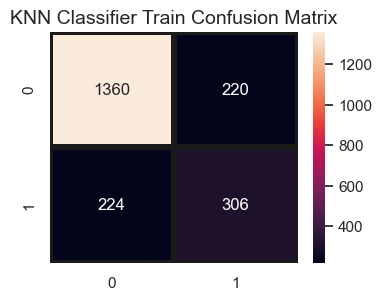

In [86]:
y_pred_test = KNN.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))
print("R2 score: ",KNN.score(X_train, y_train))
y_pred= KNN.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN Classifier Train Confusion Matrix",fontsize=14)
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_test)))

Accuracy Score:  0.7895734597156399
RMSE:  0.4587227270196673


**4. Gradient Boosting Classifier**

In [88]:
X = df_dummies.drop('Churn',axis=1)
y = df_dummies['Churn']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=101)

Accuracy Score:  0.8085308056872038
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.65      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



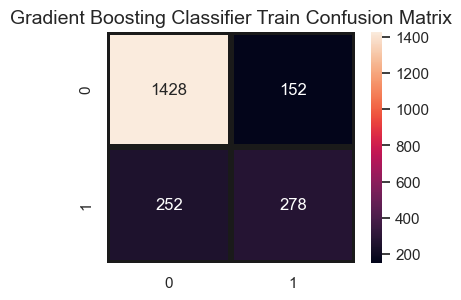

In [90]:
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Train Confusion Matrix",fontsize=14)
plt.show()

In [91]:
parameters = {"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(50, 100),
                  "max_depth"    : sp_randInt(2, 8)
                 }

randm = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 10, n_jobs=-1)

randm.fit(X_train, y_train)

print(randm.best_params_)

randm_best_gb = randm.best_params_

gb = GradientBoostingClassifier(**randm_best_gb)

gb.fit(X_train, y_train)

{'learning_rate': 0.10922692868747441, 'max_depth': 2, 'n_estimators': 84, 'subsample': 0.20810982352866014}


GradientBoostingClassifier(learning_rate=0.10922692868747441, max_depth=2,
                           n_estimators=84, subsample=0.20810982352866014)

Test :
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.65      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



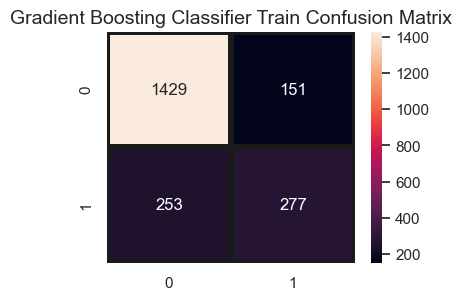

Accuracy Score:  0.8085308056872038
R2 score:  0.8094270621698496
RMSE:  0.4375719304443513


In [92]:
y_pred_test = gb.predict(X_test)

print('Test :')
print(classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Train Confusion Matrix",fontsize=14)
plt.show()
print("Accuracy Score: ",accuracy_score(y_test, y_pred_test))
print("R2 score: ",gb.score(X_train, y_train))
y_pred= gb.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

**5. ADA Boost**

1. Grid Search CV here tries different parameters for the Decision Tree that is being used in the Classfier

In [93]:
!pip install hyperopt

In [94]:
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.tree import DecisionTreeClassifier
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier

In [95]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50, 100]
             }
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

In [96]:
base_adb = AdaBoostClassifier()
base_adb.fit(X_train,y_train)
preds_base_adb = base_adb.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, preds_base_adb))

Accuracy 0.8104265402843602


Test :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1580
           1       0.64      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.81      2110



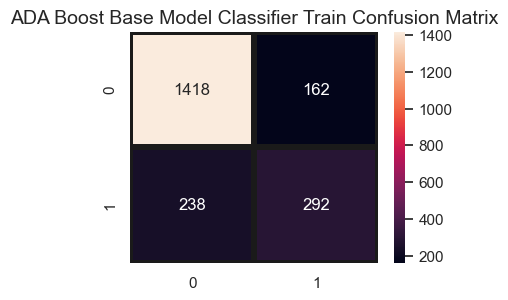

Accuracy Score:  0.8104265402843602
R2 score:  0.8108492482730597
RMSE:  0.4354003441841081


In [97]:


print('Test :')
print(classification_report(y_test, preds_base_adb))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds_base_adb),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("ADA Boost Base Model Classifier Train Confusion Matrix",fontsize=14)
plt.show()
print("Accuracy Score: ",accuracy_score(y_test, preds_base_adb))
print("R2 score: ",base_adb.score(X_train, y_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,preds_base_adb)))

In [98]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250],
              'learning_rate':[0.01,0.1]}

clf_gcv = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf_gcv.fit(X_train,y_train)
preds_gcv_abc = clf_gcv.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test, preds_gcv_abc))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\Aston\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy 0.8113744075829384


ADABOOST GSCV Test :
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.65      0.54      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.81      2110



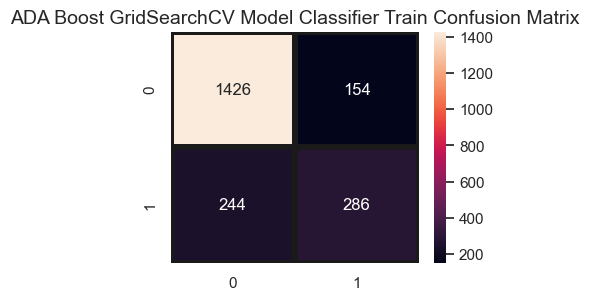

Accuracy Score:  0.8113744075829384
R2 score:  0.6548243843358903
RMSE:  0.43431047928533983


In [99]:


print('ADABOOST GSCV Test :')
print(classification_report(y_test, preds_gcv_abc))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds_gcv_abc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("ADA Boost GridSearchCV Model Classifier Train Confusion Matrix",fontsize=14)
plt.show()
print("Accuracy Score: ",accuracy_score(y_test, preds_gcv_abc))
print("R2 score: ",clf_gcv.score(X_train, y_train))

print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,preds_gcv_abc)))

**6. XG Boost**

In [100]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [101]:
# GridsearchCV

In [102]:
# Define the search space
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [19,20,21],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [1,1.2,1.5,2,2.3]
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgboost = XGBClassifier()

XGBOOST Test :
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.61      0.52      0.56       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



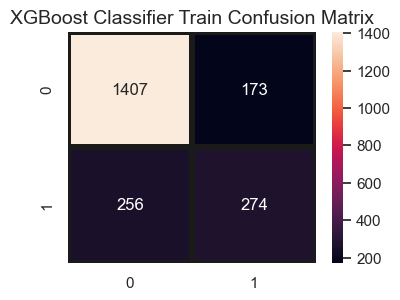

Accuracy Score:  0.7966824644549763
R2 score:  0.953474197480699
RMSE:  0.450907457850304


In [103]:
# Fit base xgboost search
xgboost.fit(X_train, y_train)
xgb_pred = xgboost.predict(X_test)


print('XGBOOST Test :')
print(classification_report(y_test, xgb_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBoost Classifier Train Confusion Matrix",fontsize=14)
plt.show()
print("Accuracy Score: ",accuracy_score(y_test, xgb_pred))
print("R2 score: ",xgboost.score(X_train, y_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,xgb_pred)))

In [104]:
# Define grid search
grid_search = GridSearchCV(estimator=xgboost, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.8],
                         'reg_alpha': [19, 20, 21],
                         'reg_lambda': [1, 1.2, 1.5, 2, 2.3]},
             refit='accuracy', scoring=['accuracy'])

In [105]:
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
# print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8021
The best hyperparameters are {'colsample_bytree': 0.3, 'reg_alpha': 21, 'reg_lambda': 2.3}


In [106]:
preds_gcv_xgb = grid_search.predict(X_test)

XGBOOST GSCV Test :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1580
           1       0.66      0.54      0.59       530

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.81      0.81      0.81      2110



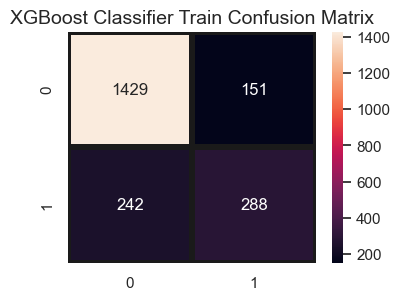

Accuracy Score:  0.8137440758293839
R2 score:  0.8088175538399025
RMSE:  0.43157377604601527


In [107]:


print('XGBOOST GSCV Test :')
print(classification_report(y_test, preds_gcv_xgb))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds_gcv_xgb),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBoost Classifier Train Confusion Matrix",fontsize=14)
plt.show()
print("Accuracy Score: ",accuracy_score(y_test, preds_gcv_xgb))
print("R2 score: ",grid_search.score(X_train, y_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,preds_gcv_xgb)))

<font size=5>**Graphs for analyzing best model**

In [108]:
Churn={'model':['LR','RF','KNN','GBC','ADA','XGB'],
       "Accuracy Score":[0.81,0.81,0.76,0.81,0.81,0.80],
        "Precision":[0.75, 0.75,0.68,0.75,0.75,0.73],
        "Recall":[0.72,0.71,0.67,0.71,0.72,0.70],
      "F1 score":[0.73,0.72,0.67,0.73,0.73,0.71]}
churn_vanilla = pd.DataFrame(Churn)

Churn1={'model':['LR','RF','KNN','GBC','ADA','XGB'],
       "Accuracy Score":[0.81,0.81,0.79,0.81,0.81,0.81],
        "Precision":[0.75, 0.76,0.72,0.75,0.75,0.75],
        "Recall":[0.72,0.71,0.72,0.72,0.72,0.72],
       "F1 score":[0.73,0.73,0.72,0.73,0.73,0.73]}
churn_hyper = pd.DataFrame(Churn1)

<font size=5>**Models before hyperparameter tuning**

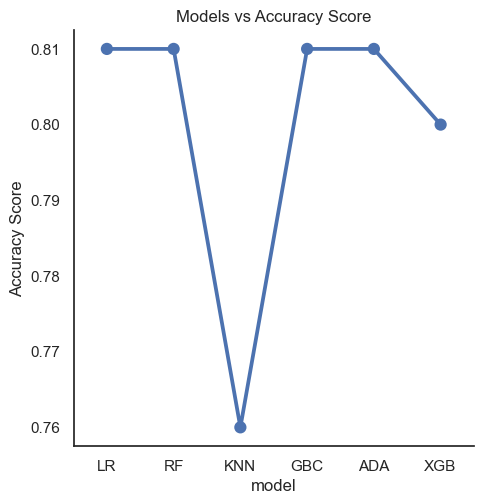

In [109]:
sns.catplot(x='model',y="Accuracy Score",linestyles=["-"],kind="point",data=churn_vanilla).set(title="Models vs Accuracy Score")

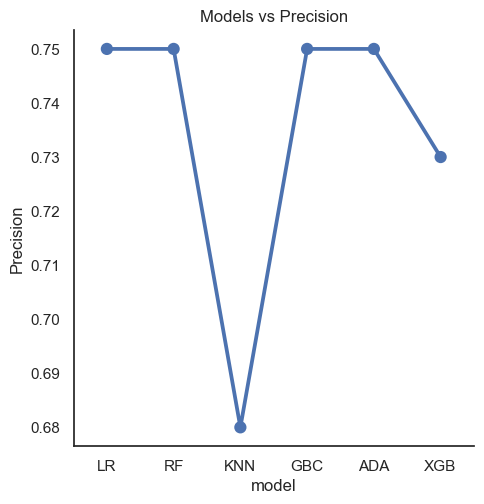

In [110]:
sns.catplot(x='model',y="Precision",linestyles=["-"],kind="point",data=churn_vanilla).set(title="Models vs Precision")

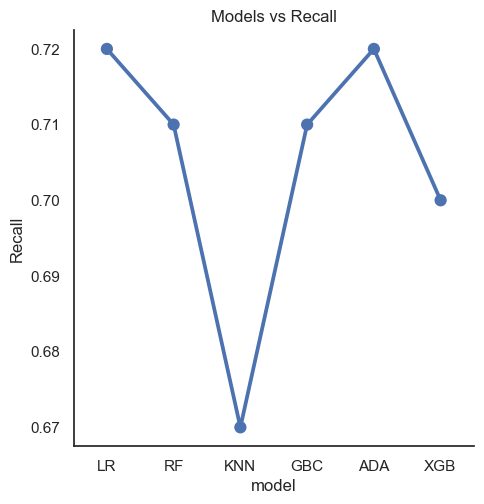

In [111]:
sns.catplot(x='model',y="Recall",linestyles=["-"],kind="point",data=churn_vanilla).set(title="Models vs Recall")

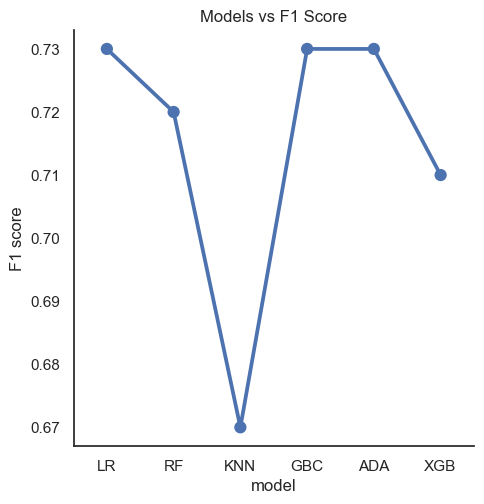

In [112]:
sns.catplot(x='model',y="F1 score",linestyles=["-"],kind="point",data=churn_vanilla).set(title="Models vs F1 Score")

<font size=5>**Models after hyperparameter tuning**

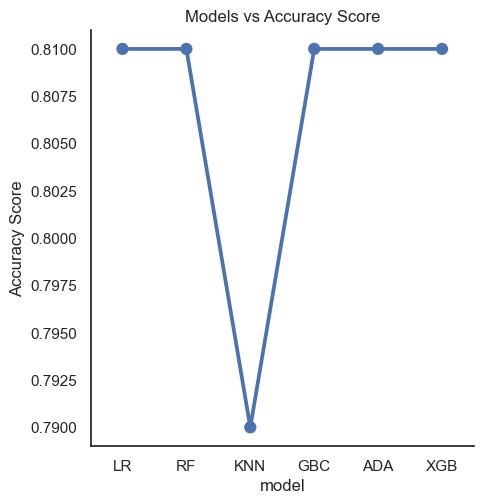

In [113]:
sns.catplot(x='model',y="Accuracy Score",linestyles=["-"],kind="point",data=churn_hyper).set(title="Models vs Accuracy Score")

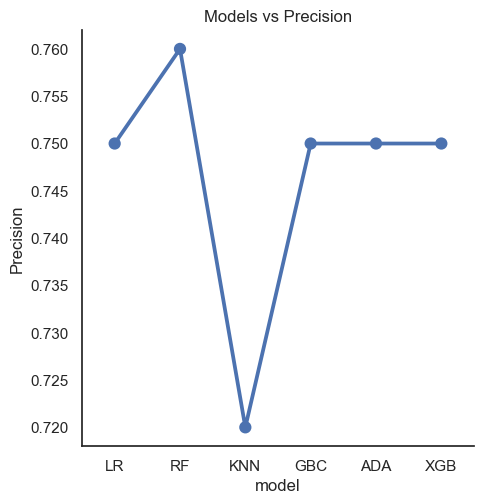

In [114]:
sns.catplot(x='model',y="Precision",linestyles=["-"],kind="point",data=churn_hyper).set(title="Models vs Precision")

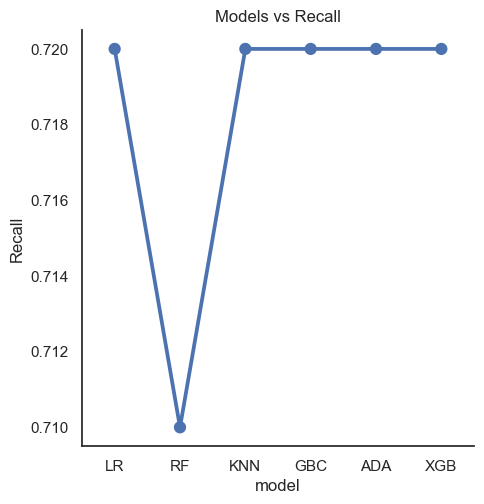

In [115]:
sns.catplot(x='model',y="Recall",linestyles=["-"],kind="point",data=churn_hyper).set(title="Models vs Recall")

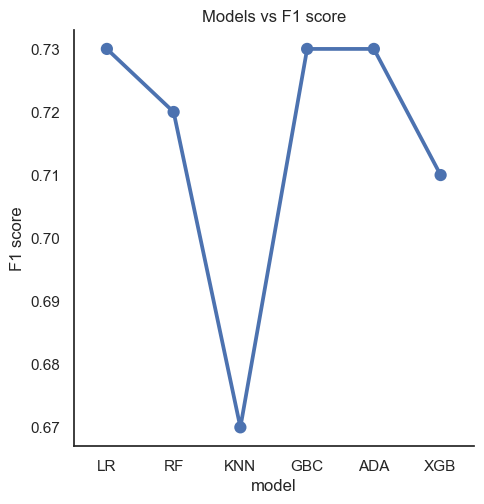

In [116]:
sns.catplot(x='model',y="F1 score",linestyles=["-"],kind="point",data=churn_vanilla).set(title="Models vs F1 score")

In [117]:
!pip freeze

absl-py==1.4.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.1
anaconda-navigator==2.4.0
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
astroid @ file:///C:/b/abs_d4lg3_taxn/croot/astroid_1676904351456/work
astropy @ file:///C:/ci/astropy_1657719642921/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_

In [118]:
import subprocess
pip_freeze_output = subprocess.check_output(['pip', 'freeze']).decode('utf-8')
print(pip_freeze_output)

absl-py==1.4.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.1
anaconda-navigator==2.4.0
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
astroid @ file:///C:/b/abs_d4lg3_taxn/croot/astroid_1676904351456/work
astropy @ file:///C:/ci/astropy_1657719642921/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_

In [119]:
!pip freeze > requirements.txt
!cat requirements.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.
